# **AI Handwriting Detection (digits) - Using 3 techniques**

**Resize image pixels code**

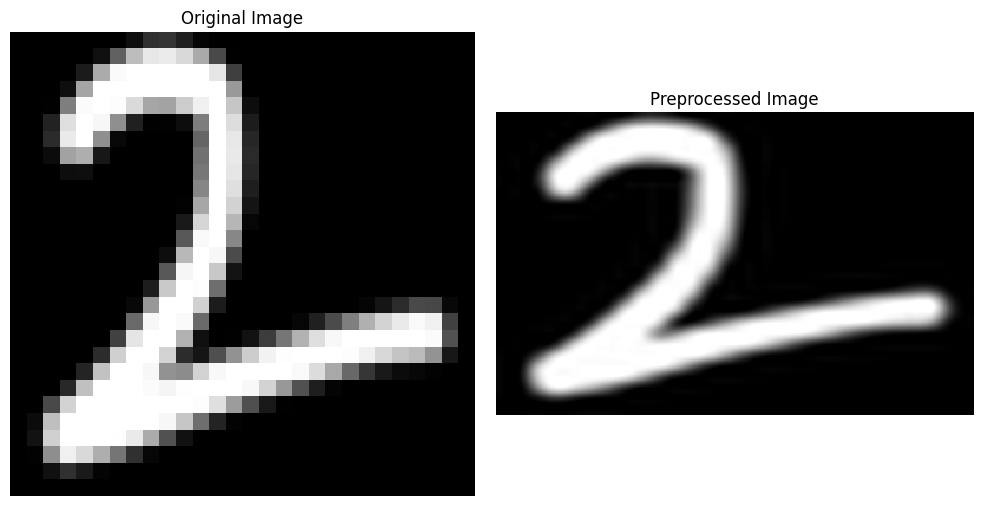

Preprocessed Tensor Shape: torch.Size([1, 1, 257, 405])


In [ ]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Function to preprocess the input image
def preprocess_image(image_path):
    """
    Preprocesses an input image for a VAE trained on MNIST.
    Args:
        image_path (str): Path to the input image.
    Returns:
        original_image (PIL.Image): The original image.
        resized_image (PIL.Image): The resized grayscale image (28x28).
        preprocessed_tensor (torch.Tensor): The preprocessed image tensor.
    """
    # Load the image using PIL
    original_image = Image.open(image_path).convert('L')  # Convert to grayscale

    # Resize to 28x28 (MNIST size) using high-quality resampling
    resized_image = original_image.resize((405, 257), Image.Resampling.LANCZOS)

    # Convert to PyTorch tensor and normalize
    transform = transforms.Compose([
        transforms.ToTensor(),  # Converts to [0, 1] range
        transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
    ])
    preprocessed_tensor = transform(resized_image).unsqueeze(0)  # Add batch dimension

    return original_image, resized_image, preprocessed_tensor

# Function to visualize the original and preprocessed images
def visualize_images(original_image, resized_image):
    """
    Visualizes the original and preprocessed images.
    Args:
        original_image (PIL.Image): The original image.
        resized_image (PIL.Image): The resized grayscale image (28x28).
    """
    plt.figure(figsize=(10, 5))

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Preprocessed Image (Resized to 28x28)
    plt.subplot(1, 2, 2)
    plt.imshow(resized_image, cmap='gray', interpolation='none')
    plt.title("Preprocessed Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Path to your input image
image_path = "2_img (1).png"  # Replace with the path to your image

# Preprocess the input image
original_image, resized_image, preprocessed_tensor = preprocess_image(image_path)

# Visualize the original and preprocessed images
visualize_images(original_image, resized_image)

# Print the shape of the preprocessed tensor
print("Preprocessed Tensor Shape:", preprocessed_tensor.shape)

**Image Augmentation (100 variations) Template code**

<ipython-input-17-4a5565505729>:191: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


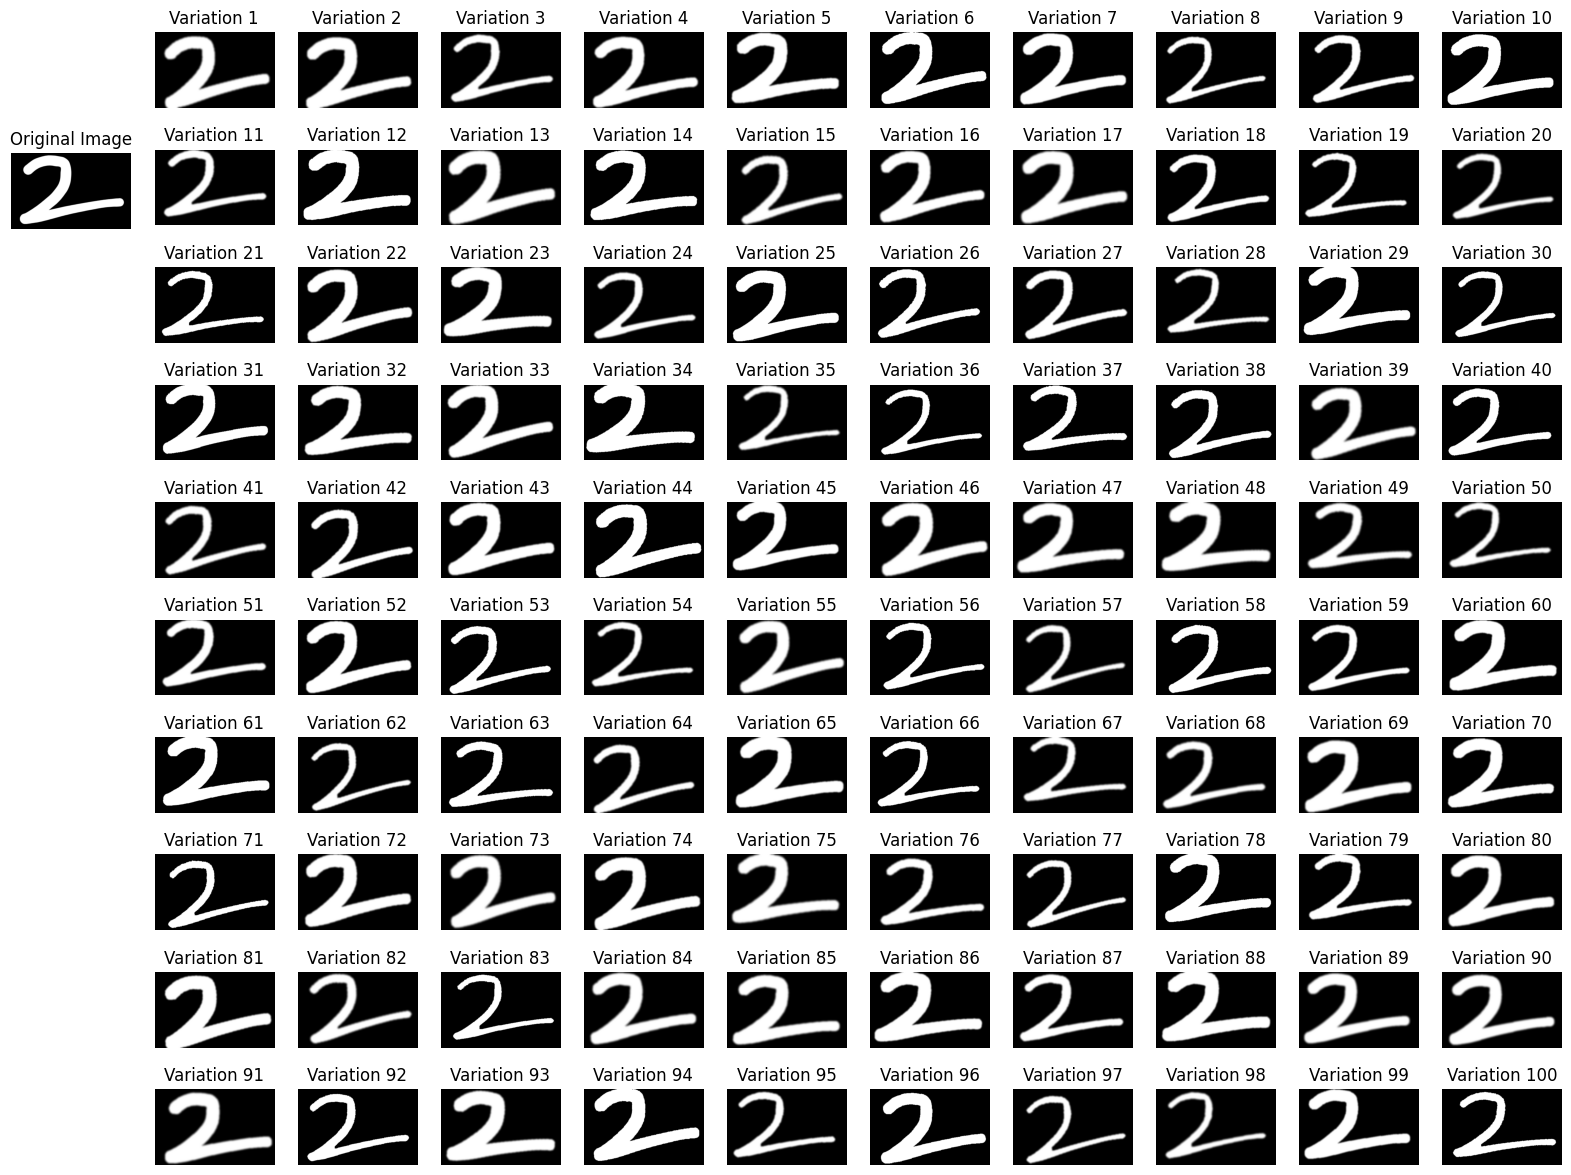

In [ ]:
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
import random
from scipy.ndimage import binary_erosion, binary_dilation

# def create_evident_variations(image, num_variations=30, noise_intensity=0.3, edge_strength=2):
#     """
#     Create variations of an image by modifying edges unevenly.
#     - More erosion on the left, more dilation on the right.
#     - More modification on the bottom, fewer on the top.
#     """
#     variations = []
#     img_array = np.array(image)  # Convert image to NumPy array
#     binary_mask = img_array > 128  # Create a binary mask of the digit

#     # Identify edge pixels
#     edge_pixels = np.column_stack(np.where(binary_mask ^ binary_erosion(binary_mask, structure=np.ones((3, 3)))) )
#     num_edge_pixels = len(edge_pixels)

#     for _ in range(num_variations):
#         # Create a copy of the original image
#         modified_array = img_array.copy()

#         # Randomly choose a kernel size for variation in edge modification
#         kernel_size = random.choice([5, 7, 9, 11])  # Larger kernel sizes for stronger modifications

#         # Bias for uneven edge modifications (stronger biases)
#         left_bias = random.uniform(0.1, 0.3)   # Stronger bias for the left portion (less modification)
#         right_bias = random.uniform(1.5, 3.0)  # Stronger bias for the right portion (more modification)
#         top_bias = random.uniform(0.1, 0.3)    # Stronger bias for the top portion (less modification)
#         bottom_bias = random.uniform(1.5, 3.0) # Stronger bias for the bottom portion (more modification)

#         # Modify white pixels on the edges with bias
#         for y, x in edge_pixels:
#             if random.random() < 0.8:  # 50% chance to modify
#                 # Left vs right bias
#                 if x < img_array.shape[1] // 2:  # Left side
#                     if random.random() < left_bias:  # Lower probability
#                         modified_array[y, x] = 0  # Remove (black)
#                 else:  # Right side
#                     if random.random() < right_bias:  # Higher probability
#                         modified_array[y, x] = 255  # Add (white)

#                 # Top vs bottom bias
#                 if y < img_array.shape[0] // 2:  # Top side
#                     if random.random() < top_bias:  # Lower probability
#                         modified_array[y, x] = 0  # Remove (black)
#                 else:  # Bottom side
#                     if random.random() < bottom_bias:  # Higher probability
#                         modified_array[y, x] = 255  # Add (white)

#         # Apply aggressive morphological operations (erosion/dilation)
#         if random.random() > 0.5:
#             modified_array = binary_erosion(modified_array > 128, structure=np.ones((kernel_size, kernel_size))).astype(np.uint8) * 255
#         else:
#             modified_array = binary_dilation(modified_array > 128, structure=np.ones((kernel_size, kernel_size))).astype(np.uint8) * 255

#         # Convert back to PIL image
#         modified_image = Image.fromarray(modified_array)

#         # Apply significant geometric transformations
#         angle = random.uniform(-5, 5)  # Increased rotation range
#         translated_x = random.uniform(-10, 10)
#         translated_y = random.uniform(-10, 10)
#         modified_image = modified_image.rotate(angle, translate=(translated_x, translated_y))

#         # Adjust brightness and contrast with more noticeable variation
#         brightness_factor = random.uniform(0.5, 1.5)  # More variation
#         contrast_factor = random.uniform(0.5, 1.5)

#         enhancer = ImageEnhance.Brightness(modified_image)
#         modified_image = enhancer.enhance(brightness_factor)

#         enhancer = ImageEnhance.Contrast(modified_image)
#         modified_image = enhancer.enhance(contrast_factor)

#         # Apply stronger blurring for smoother transitions
#         if random.random() > 0.3:  # Increase the probability of blurring
#             modified_image = modified_image.filter(ImageFilter.GaussianBlur(radius=random.uniform(1.5, 3.0)))

#         variations.append(modified_image)

#     return variations

def create_evident_variations(image, num_variations=30, noise_intensity=0.3, edge_strength=2):
    """
    Create variations of an image by modifying edges unevenly.
    - More erosion on the left, more dilation on the right.
    - More modification on the bottom, fewer on the top.
    """
    variations = []
    img_array = np.array(image)  # Convert image to NumPy array
    binary_mask = img_array > 128  # Create a binary mask of the digit

    # Identify edge pixels
    edge_pixels = np.column_stack(np.where(binary_mask ^ binary_erosion(binary_mask, structure=np.ones((3, 3)))))
    num_edge_pixels = len(edge_pixels)

    for _ in range(num_variations):
        # Create a copy of the original image
        modified_array = img_array.copy()

        # Randomly choose a kernel size for variation in edge modification
        kernel_size = random.choice([5, 7, 9, 11])  # Larger kernel sizes for stronger modifications

        # Bias for uneven edge modifications (stronger biases)
        left_bias = random.uniform(0.1, 0.3)   # Stronger bias for the left portion (less modification)
        right_bias = random.uniform(1.5, 3.0)  # Stronger bias for the right portion (more modification)
        top_bias = random.uniform(0.1, 0.3)    # Stronger bias for the top portion (less modification)
        bottom_bias = random.uniform(1.5, 3.0) # Stronger bias for the bottom portion (more modification)

        # Modify white pixels on the edges with bias
        for y, x in edge_pixels:
            if random.random() < 0.8:  # 50% chance to modify
                # Left vs right bias
                if x < img_array.shape[1] // 2:  # Left side
                    if random.random() < left_bias:  # Lower probability
                        modified_array[y, x] = 0  # Remove (black)
                else:  # Right side
                    if random.random() < right_bias:  # Higher probability
                        modified_array[y, x] = 255  # Add (white)

                # Top vs bottom bias
                if y < img_array.shape[0] // 2:  # Top side
                    if random.random() < top_bias:  # Lower probability
                        modified_array[y, x] = 0  # Remove (black)
                else:  # Bottom side
                    if random.random() < bottom_bias:  # Higher probability
                        modified_array[y, x] = 255  # Add (white)

        # Apply aggressive morphological operations (erosion/dilation)
        if random.random() > 0.5:
            modified_array = binary_erosion(modified_array > 128, structure=np.ones((kernel_size, kernel_size))).astype(np.uint8) * 255
        else:
            modified_array = binary_dilation(modified_array > 128, structure=np.ones((kernel_size, kernel_size))).astype(np.uint8) * 255

        # Convert back to PIL image
        modified_image = Image.fromarray(modified_array)

        # Apply significant geometric transformations
        angle = random.uniform(-5, 5)  # Increased rotation range
        translated_x = random.uniform(-10, 10)
        translated_y = random.uniform(-10, 10)
        modified_image = modified_image.rotate(angle, translate=(translated_x, translated_y))

        # Adjust brightness and contrast with more noticeable variation
        brightness_factor = random.uniform(0.5, 1.5)  # More variation
        contrast_factor = random.uniform(0.5, 1.5)

        enhancer = ImageEnhance.Brightness(modified_image)
        modified_image = enhancer.enhance(brightness_factor)

        enhancer = ImageEnhance.Contrast(modified_image)
        modified_image = enhancer.enhance(contrast_factor)

        # Apply stronger blurring for smoother transitions
        if random.random() > 0.3:  # Increase the probability of blurring
            modified_image = modified_image.filter(ImageFilter.GaussianBlur(radius=random.uniform(1.5, 3.0)))

        variations.append(modified_image)

    return variations

# Load your input image
image_path = "2_img.png"  # Update this path to your image
input_image = Image.open(image_path).convert('L')  # Convert to grayscale

# Generate variations
variations = create_evident_variations(input_image, num_variations=100, noise_intensity=0.3, edge_strength=2)

# Display the original and modified images
# Display the original and modified images in 3 rows and 10 columns
plt.figure(figsize=(20, 15))

# Display the original image
plt.subplot(3, 11, 1)
plt.imshow(input_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Display variations in a 3x10 grid
for i in range(100):
    row = i // 10 + 1  # Determine the row (1, 2, or 3)
    col = i % 10 + 2  # Determine the column (2 to 11)
    plt.subplot(10, 11, col + (row - 1) * 11)
    plt.imshow(variations[i], cmap='gray')
    plt.title(f"Variation {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()



**CNN to identify digit 2 of my handwriting**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from PIL import Image, ImageEnhance, ImageFilter
import random
from scipy.ndimage import binary_erosion, binary_dilation
import matplotlib.pyplot as plt

# Function to create variations of an image
def create_evident_variations(image, num_variations=10, noise_intensity=0.3, edge_strength=2):
    variations = []
    img_array = np.array(image)  # Convert image to NumPy array
    binary_mask = img_array > 128  # Create a binary mask of the digit

    edge_pixels = np.column_stack(np.where(binary_mask ^ binary_erosion(binary_mask, structure=np.ones((3, 3)))))

    for _ in range(num_variations):
        modified_array = img_array.copy()
        kernel_size = 7
        left_bias = 0.3
        right_bias = 1.5

        for y, x in edge_pixels:
            if random.random() < 0.5:
                if x < img_array.shape[1] // 2:
                    if random.random() < left_bias:
                        modified_array[y, x] = 0
                else:
                    if random.random() < right_bias:
                        modified_array[y, x] = 255

        if random.random() > 0.5:
            modified_array = binary_erosion(modified_array > 128, structure=np.ones((kernel_size, kernel_size))).astype(np.uint8) * 255
        else:
            modified_array = binary_dilation(modified_array > 128, structure=np.ones((kernel_size, kernel_size))).astype(np.uint8) * 255

        modified_image = Image.fromarray(modified_array)
        angle = random.uniform(-8, 8)
        translated_x = random.uniform(-5, 5)
        translated_y = random.uniform(-5, 5)
        modified_image = modified_image.rotate(angle, translate=(translated_x, translated_y))

        brightness_factor = random.uniform(0.7, 1.3)
        contrast_factor = random.uniform(0.8, 1.4)

        enhancer = ImageEnhance.Brightness(modified_image)
        modified_image = enhancer.enhance(brightness_factor)

        enhancer = ImageEnhance.Contrast(modified_image)
        modified_image = enhancer.enhance(contrast_factor)

        if random.random() > 0.5:
            modified_image = modified_image.filter(ImageFilter.GaussianBlur(radius=random.uniform(0.5, 1.5)))

        variations.append(modified_image)

    return variations

# Load your input image
image_path = "2_img.png"
input_image = Image.open(image_path).convert('L')  # Convert to grayscale

# Generate variations
variations = create_evident_variations(input_image, num_variations=10, noise_intensity=0.3, edge_strength=2)

# Prepare positive samples (your handwriting)
x_positive_custom = np.array([np.array(img.resize((28, 28))) for img in variations])
x_positive_custom = x_positive_custom / 255.0  # Normalize
x_positive_custom = x_positive_custom.reshape((-1, 28, 28, 1))  # Reshape for CNN input
y_positive_custom = np.zeros(len(x_positive_custom))  # Label for your handwriting is 0

# Load MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

# Prepare MNIST digit "2" samples (not your handwriting)
x_positive_mnist = x_train_mnist[y_train_mnist == 2]
x_positive_mnist = x_positive_mnist / 255.0  # Normalize
x_positive_mnist = x_positive_mnist.reshape((-1, 28, 28, 1))  # Reshape for CNN input
y_positive_mnist = np.ones(len(x_positive_mnist))  # Label for MNIST digit "2" is 1

# Prepare negative samples (digits other than "2")
x_negative = x_train_mnist[y_train_mnist != 2]
x_negative = x_negative / 255.0  # Normalize
x_negative = x_negative.reshape((-1, 28, 28, 1))  # Reshape for CNN input
y_negative = np.full(len(x_negative), 2)  # Label for non-"2" digits is 2

# Combine all samples
x_train = np.concatenate((x_positive_custom, x_positive_mnist, x_negative))
y_train = np.concatenate((y_positive_custom, y_positive_mnist, y_negative))

# Convert labels to categorical (3 classes)
y_train = to_categorical(y_train, 3)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64)

# Function to preprocess and predict a custom image
def predict_custom_image(img_path):
    # Load and preprocess the image
    img = Image.open(img_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28
    img_array = np.array(img)  # Convert to NumPy array
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    img_array = img_array.reshape((1, 28, 28, 1))  # Reshape for model input

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    # Display the result
    if predicted_class == 0:
        print("The image is predicted to be your handwriting (digit 2).")
    elif predicted_class == 1:
        print("The image is predicted to be a digit 2 (not your handwriting).")
    elif predicted_class == 2:
        print("The image is predicted to be something other than digit 2.")



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 57ms/step - accuracy: 0.9630 - loss: 0.1180
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 53ms/step - accuracy: 0.9949 - loss: 0.0140
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.9973 - loss: 0.0085
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9980 - loss: 0.0059
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9985 - loss: 0.0044


In [ ]:

predict_custom_image("a_img.png")
predict_custom_image("c_img.png")
predict_custom_image("2_img.png")
predict_custom_image("2_test_img_1.png")
predict_custom_image("2_test_img_2.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The image is predicted to be something other than digit 2.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The image is predicted to be something other than digit 2.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The image is predicted to be your handwriting (digit 2).
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The image is predicted to be a digit 2 (not your handwriting).


**VAE - create variations + CNN to predict**

Epoch 1: Avg Loss = 361.1698
Epoch 2: Avg Loss = 250.0219
Epoch 3: Avg Loss = 241.8841
Epoch 4: Avg Loss = 241.2956
Epoch 5: Avg Loss = 234.7978
Epoch 6: Avg Loss = 234.1380
Epoch 7: Avg Loss = 232.5543
Epoch 8: Avg Loss = 232.4922
Epoch 9: Avg Loss = 233.8358
Epoch 10: Avg Loss = 233.5429
Epoch 11: Avg Loss = 232.0923
Epoch 12: Avg Loss = 232.2713
Epoch 13: Avg Loss = 232.2423
Epoch 14: Avg Loss = 230.0092
Epoch 15: Avg Loss = 224.6445
Epoch 16: Avg Loss = 225.3684
Epoch 17: Avg Loss = 225.1156
Epoch 18: Avg Loss = 223.1212
Epoch 19: Avg Loss = 220.3871
Epoch 20: Avg Loss = 221.6947
Epoch 21: Avg Loss = 226.5677
Epoch 22: Avg Loss = 223.3237
Epoch 23: Avg Loss = 221.7993
Epoch 24: Avg Loss = 221.2833
Epoch 25: Avg Loss = 221.3511
Epoch 26: Avg Loss = 221.1568
Epoch 27: Avg Loss = 221.0756
Epoch 28: Avg Loss = 221.4137
Epoch 29: Avg Loss = 219.8965
Epoch 30: Avg Loss = 219.9485
Epoch 31: Avg Loss = 217.6517
Epoch 32: Avg Loss = 217.9999
Epoch 33: Avg Loss = 215.6791
Epoch 34: Avg Loss 

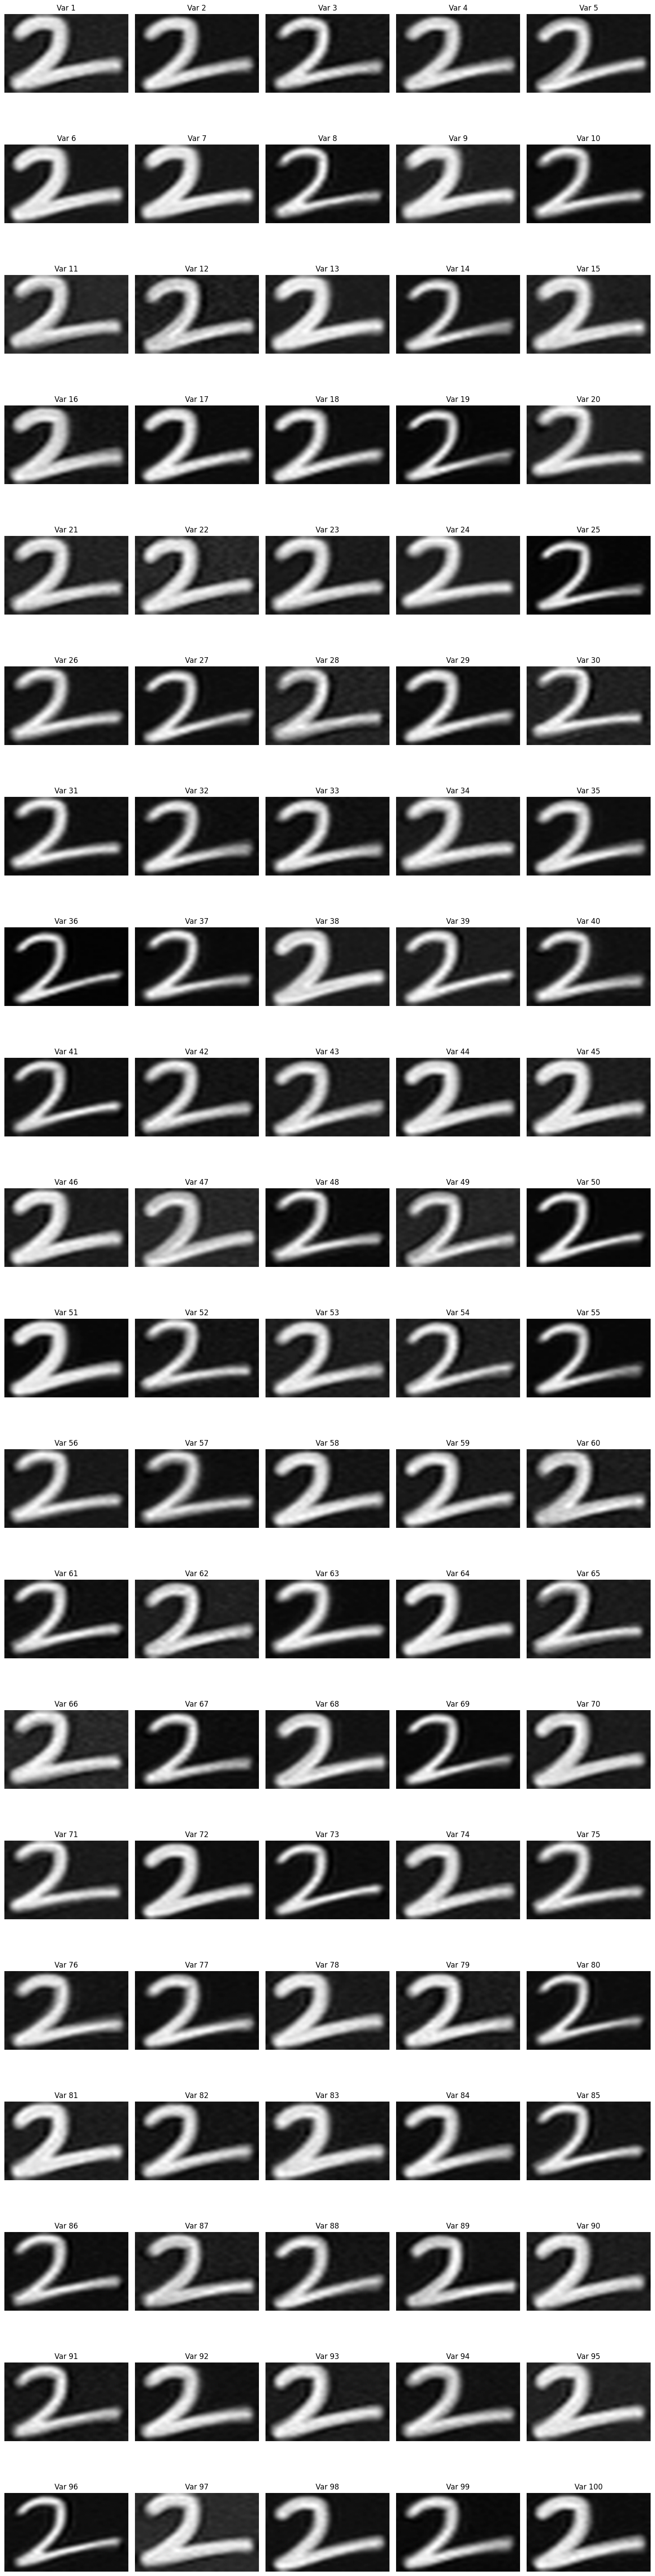

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
940/940 ━━━━━━━━━━━━━━━━━━━━ 85s 88ms/step - accuracy: 0.9654 - loss: 0.1067
Epoch 2/5
940/940 ━━━━━━━━━━━━━━━━━━━━ 139s 85ms/step - accuracy: 0.9958 - loss: 0.0123
Epoch 3/5
940/940 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.9977 - loss: 0.0070
Epoch 4/5
940/940 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.9976 - loss: 0.0067
Epoch 5/5
940/940 ━━━━━━━━━━━━━━━━━━━━ 83s 87ms/step - accuracy: 0.9982 - loss: 0.0049


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image, ImageEnhance, ImageFilter
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import binary_erosion, binary_dilation
import random
import math
from torchvision.transforms.functional import to_pil_image
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
# ========== Define the Improved VAE Model ==========
class VAE(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=512, latent_dim=128):
        super(VAE, self).__init__()

        # Encoder
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.fc_mean = nn.Linear(hidden_dim // 2, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim // 2, latent_dim)

        # Decoder
        self.fc3 = nn.Linear(latent_dim, hidden_dim // 2)
        self.fc4 = nn.Linear(hidden_dim // 2, hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, input_dim)

    def encode(self, x):
        h1 = torch.relu(self.fc1(x))
        h2 = torch.relu(self.fc2(h1))
        return self.fc_mean(h2), self.fc_logvar(h2)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std * 2.0  # Increase multiplier for more diversity

    def decode(self, z):
        h3 = torch.relu(self.fc3(z))
        h4 = torch.relu(self.fc4(h3))
        return torch.sigmoid(self.fc5(h4))  # Sigmoid to ensure output is in [0, 1]

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# ========== Loss Function ==========
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x.view(-1, 784), reduction='sum')  # Reconstruction loss
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())  # KL divergence
    return BCE + 0.5 * KLD  # Increase KLD weight to 0.5

# ========== Create Evident Variations ==========
def create_evident_variations(image, num_variations=100, noise_intensity=0.3, edge_strength=2):
    """
    Create variations of an image by modifying edges unevenly.
    - More erosion on the left, more dilation on the right.
    - More modification on the bottom, fewer on the top.
    """
    variations = []
    img_array = np.array(image)  # Convert image to NumPy array
    binary_mask = img_array > 128  # Create a binary mask of the digit

    # Identify edge pixels
    edge_pixels = np.column_stack(np.where(binary_mask ^ binary_erosion(binary_mask, structure=np.ones((3, 3)))))
    num_edge_pixels = len(edge_pixels)

    for _ in range(num_variations):
        # Create a copy of the original image
        modified_array = img_array.copy()

        # Randomly choose a kernel size for variation in edge modification
        kernel_size = random.choice([5, 7, 9, 11])  # Larger kernel sizes for stronger modifications

        # Bias for uneven edge modifications (stronger biases)
        left_bias = random.uniform(0.1, 0.3)   # Stronger bias for the left portion (less modification)
        right_bias = random.uniform(1.5, 3.0)  # Stronger bias for the right portion (more modification)
        top_bias = random.uniform(0.1, 0.3)    # Stronger bias for the top portion (less modification)
        bottom_bias = random.uniform(1.5, 3.0) # Stronger bias for the bottom portion (more modification)

        # Modify white pixels on the edges with bias
        for y, x in edge_pixels:
            if random.random() < 0.8:  # 50% chance to modify
                # Left vs right bias
                if x < img_array.shape[1] // 2:  # Left side
                    if random.random() < left_bias:  # Lower probability
                        modified_array[y, x] = 0  # Remove (black)
                else:  # Right side
                    if random.random() < right_bias:  # Higher probability
                        modified_array[y, x] = 255  # Add (white)

                # Top vs bottom bias
                if y < img_array.shape[0] // 2:  # Top side
                    if random.random() < top_bias:  # Lower probability
                        modified_array[y, x] = 0  # Remove (black)
                else:  # Bottom side
                    if random.random() < bottom_bias:  # Higher probability
                        modified_array[y, x] = 255  # Add (white)

        # Apply aggressive morphological operations (erosion/dilation)
        if random.random() > 0.5:
            modified_array = binary_erosion(modified_array > 128, structure=np.ones((kernel_size, kernel_size))).astype(np.uint8) * 255
        else:
            modified_array = binary_dilation(modified_array > 128, structure=np.ones((kernel_size, kernel_size))).astype(np.uint8) * 255

        # Convert back to PIL image
        modified_image = Image.fromarray(modified_array)

        # Apply significant geometric transformations
        angle = random.uniform(-5, 5)  # Increased rotation range
        translated_x = random.uniform(-10, 10)
        translated_y = random.uniform(-10, 10)
        modified_image = modified_image.rotate(angle, translate=(translated_x, translated_y))

        # Adjust brightness and contrast with more noticeable variation
        brightness_factor = random.uniform(0.5, 1.5)  # More variation
        contrast_factor = random.uniform(0.5, 1.5)

        enhancer = ImageEnhance.Brightness(modified_image)
        modified_image = enhancer.enhance(brightness_factor)

        enhancer = ImageEnhance.Contrast(modified_image)
        modified_image = enhancer.enhance(contrast_factor)

        # Apply stronger blurring for smoother transitions
        if random.random() > 0.3:  # Increase the probability of blurring
            modified_image = modified_image.filter(ImageFilter.GaussianBlur(radius=random.uniform(1.5, 3.0)))

        variations.append(modified_image)

    return variations

# ========== Preprocess Variations for Training ==========
def preprocess_variations(variations):
    preprocessed_variations = []
    for img in variations:
        # Resize to 28x28 and convert to tensor
        img_resized = img.resize((28, 28), Image.Resampling.LANCZOS)
        img_tensor = transforms.ToTensor()(img_resized).view(-1, 784)
        preprocessed_variations.append(img_tensor)

    # Stack all variations into a single tensor
    preprocessed_variations = torch.stack(preprocessed_variations)
    return preprocessed_variations

# ========== Custom Dataset Class ==========
class CustomDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], torch.tensor(0)  # Dummy label (not used)

# ========== Train on Custom Dataset ==========
def train_on_custom_data(model, custom_loader, num_epochs=50):  # Increased epochs
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    for epoch in range(1, num_epochs + 1):
        train_loss = 0
        for batch_idx, (data, _) in enumerate(custom_loader):
            data = data.to(device)
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(data)
            loss = loss_function(recon_batch, data, mu, logvar)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        print(f'Epoch {epoch}: Avg Loss = {train_loss / len(custom_loader.dataset):.4f}')

# ========== Generate New Variations Without Input Encoding ==========
def generate_new_variations_without_input(model, num_variations=10):
    model.eval()
    with torch.no_grad():
        variations = []
        for i in range(num_variations):
            # Sample directly from the latent space (prior distribution)
            z = torch.randn(1, 128).to(device)  # Sample from N(0, 1)
            generated_image = model.decode(z).view(28, 28)
            # Convert the tensor to a PIL image
            generated_image_pil = to_pil_image(generated_image.cpu())  # Convert to PIL image

            # Resize the PIL image to (405, 257)
            resized_image = generated_image_pil.resize((405, 257), Image.Resampling.LANCZOS)
            variations.append(resized_image)

    return variations

# ========== Main Execution ==========
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    VAE_model = VAE().to(device)

    # Load and preprocess the input image
    image_path = "2_img.png"  # Replace with your actual image path
    input_image = Image.open(image_path).convert('L')  # Convert to grayscale

    # Generate 300 variations using the create_evident_variations function
    variations = create_evident_variations(input_image)

    # Preprocess variations for training
    preprocessed_variations = preprocess_variations(variations)

    # Create custom dataset and dataloader
    custom_dataset = CustomDataset(preprocessed_variations)
    custom_loader = DataLoader(custom_dataset, batch_size=8, shuffle=True)

    # Train the VAE on the custom dataset
    train_on_custom_data(VAE_model, custom_loader, num_epochs=100)  # Train for more epochs

    # Generate new variations without input encoding
    new_variations = generate_new_variations_without_input(VAE_model, num_variations=100)

    # Visualize the generated variations
    num_variations = len(new_variations)
    num_columns = 5  # Set a maximum number of columns
    num_rows = math.ceil(num_variations / num_columns)  # No need for +1 since no original image is shown

    plt.figure(figsize=(num_columns * 3, num_rows * 3))  # Adjust figure size based on columns and rows

    # Display each variation
    for i in range(num_variations):
        plt.subplot(num_rows, num_columns, i + 1)
        plt.imshow(new_variations[i], cmap='gray')
        plt.title(f"Var {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    x_positive_custom = np.array([np.array(img.resize((28, 28))) for img in new_variations])
    x_positive_custom = x_positive_custom / 255.0  # Normalize
    x_positive_custom = x_positive_custom.reshape((-1, 28, 28, 1))  # Reshape for CNN input
    y_positive_custom = np.zeros(len(x_positive_custom))  # Label for your handwriting is 0

    # Load MNIST dataset
    (x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

    # Prepare MNIST digit "2" samples (not your handwriting)
    x_positive_mnist = x_train_mnist[y_train_mnist == 2]
    x_positive_mnist = x_positive_mnist / 255.0  # Normalize
    x_positive_mnist = x_positive_mnist.reshape((-1, 28, 28, 1))  # Reshape for CNN input
    y_positive_mnist = np.ones(len(x_positive_mnist))  # Label for MNIST digit "2" is 1

    # Prepare negative samples (digits other than "2")
    x_negative = x_train_mnist[y_train_mnist != 2]
    x_negative = x_negative / 255.0  # Normalize
    x_negative = x_negative.reshape((-1, 28, 28, 1))  # Reshape for CNN input
    y_negative = np.full(len(x_negative), 2)  # Label for non-"2" digits is 2

    # Combine all samples
    x_train = np.concatenate((x_positive_custom, x_positive_mnist, x_negative))
    y_train = np.concatenate((y_positive_custom, y_positive_mnist, y_negative))

    # Convert labels to categorical (3 classes)
    y_train = to_categorical(y_train, 3)

    # Build the CNN model
    CNN_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(3, activation='softmax')  # Output layer for 3 classes
    ])

    # Compile the model
    CNN_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    CNN_model.fit(x_train, y_train, epochs=5, batch_size=64)
    CNN_model.save('cnn_model.h5')

    # Function to preprocess and predict a custom image
    # def predict_custom_image(img_path):
    #     # Load and preprocess the image
    #     img = Image.open(img_path).convert('L')  # Convert to grayscale
    #     img = img.resize((28, 28))  # Resize to 28x28
    #     img_array = np.array(img)  # Convert to NumPy array
    #     img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    #     img_array = img_array.reshape((1, 28, 28, 1))  # Reshape for model input

    #     # Make prediction
    #     predictions = model.predict(img_array)
    #     predicted_class = np.argmax(predictions)

    #     # Display the result
    #     if predicted_class == 0:
    #         prediction_text = "Your handwriting (digit 2)"
    #     elif predicted_class == 1:
    #         prediction_text = "MNIST digit 2 (not your handwriting)"
    #     elif predicted_class == 2:
    #         prediction_text = "Something other than digit 2"

    #     # Display the image with the prediction as the title
    #     plt.imshow(img, cmap='gray')
    #     plt.title(prediction_text)
    #     plt.axis('off')  # Hide axes
    #     plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


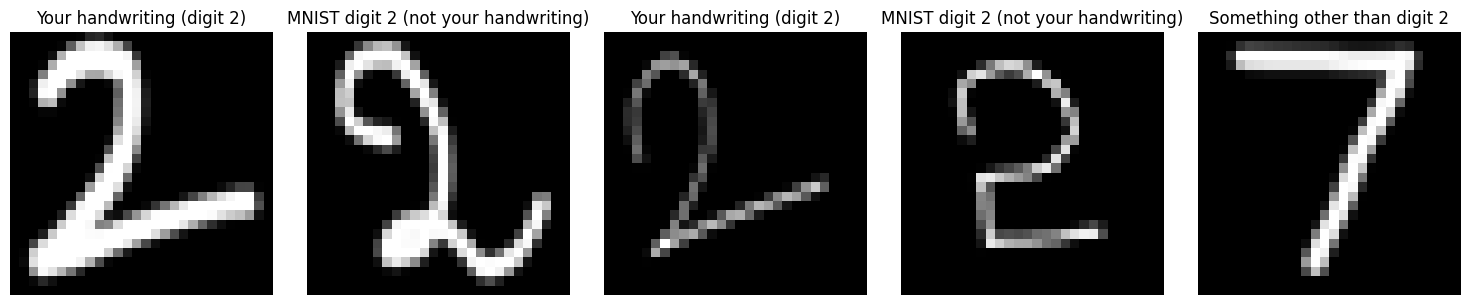

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Function to preprocess and predict a custom image
def predict_custom_image(img_path, model):
    # Load and preprocess the image
    img = Image.open(img_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28
    img_array = np.array(img)  # Convert to NumPy array
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    img_array = img_array.reshape((1, 28, 28, 1))  # Reshape for model input

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    # Determine the prediction text
    if predicted_class == 0:
        prediction_text = "Your handwriting (digit 2)"
    elif predicted_class == 1:
        prediction_text = "MNIST digit 2 (not your handwriting)"
    elif predicted_class == 2:
        prediction_text = "Something other than digit 2"

    return img, prediction_text

# List of image paths to predict
image_paths = [
    "2_img.png",
    "2_test_img_1.png",
    "2_test_img_3.png",
    "2_test_img_5.png",
    "7_test_img.png"
]

# Store results
images = []
predictions = []

# Predict for each image
for img_path in image_paths:
    img, prediction_text = predict_custom_image(img_path, model)
    images.append(img)
    predictions.append(prediction_text)

# Plot all images in a row-wise layout
plt.figure(figsize=(15, 3))  # Adjust figure size (width, height)
for i, (img, prediction_text) in enumerate(zip(images, predictions)):
    plt.subplot(1, len(images), i + 1)  # 1 row, N columns, i+1-th subplot
    plt.imshow(img, cmap='gray')
    plt.title(prediction_text)
    plt.axis('off')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

**VAE Latent Space Visulaization**

In [7]:
# Assuming your VAE model is already trained
VAE_model.eval()  # Set the model to evaluation mode
latent_vectors = []

with torch.no_grad():
    for data, _ in custom_loader:  # custom_loader is your DataLoader
        data = data.to(device)
        mu, logvar = VAE_model.encode(data.view(-1, 784))  # Encode input data
        latent_vectors.append(mu.cpu().numpy())  # Store the mean (mu) of the latent space

latent_vectors = np.concatenate(latent_vectors, axis=0)  # Combine all latent vectors

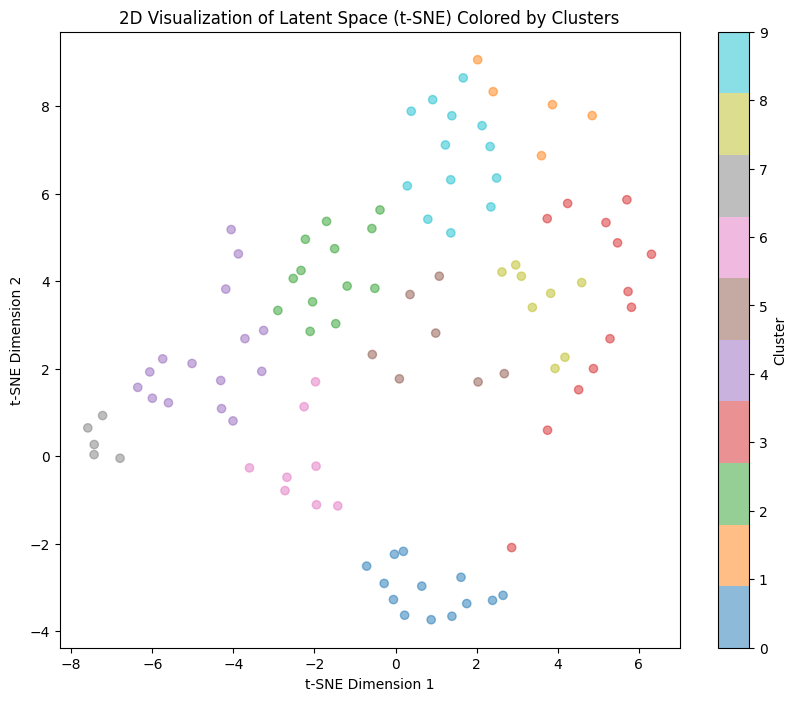

In [12]:
from sklearn.manifold import TSNE  # Import t-SNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)  # Create t-SNE reducer
latent_2d = tsne.fit_transform(latent_vectors)  # Fit and transform latent vectors

# Perform K-Means clustering (e.g., 10 clusters for MNIST digits)
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(latent_vectors)

# Plot the 2D latent space with clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=clusters, cmap='tab10', alpha=0.5)
plt.colorbar(scatter, label='Cluster')
plt.title("2D Visualization of Latent Space (t-SNE) Colored by Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

**CNN Feature map visualization**

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,869 (362.77 KB)

 Trainable params: 92,867 (362.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


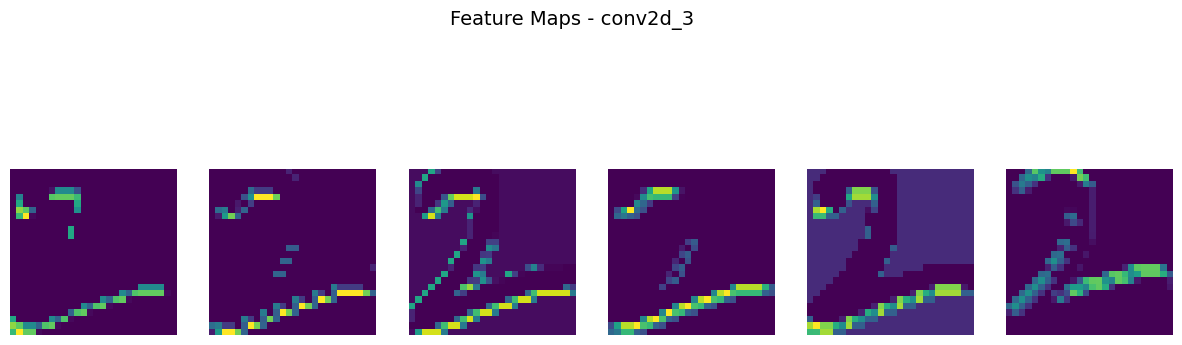

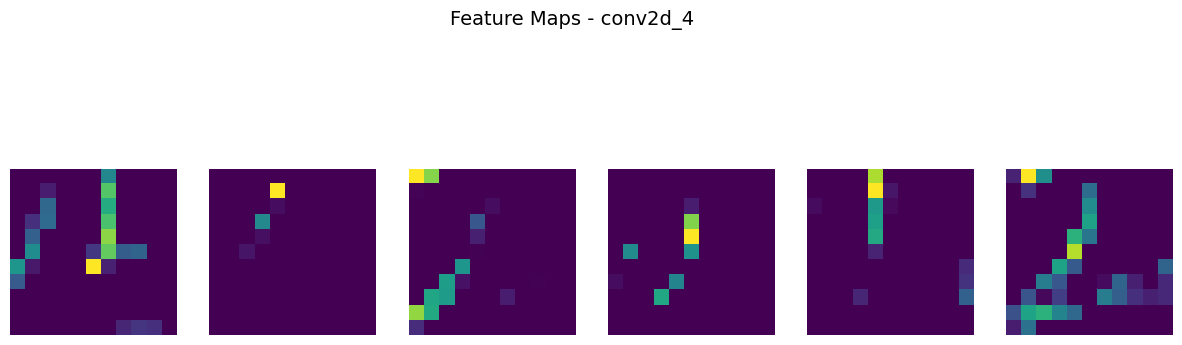

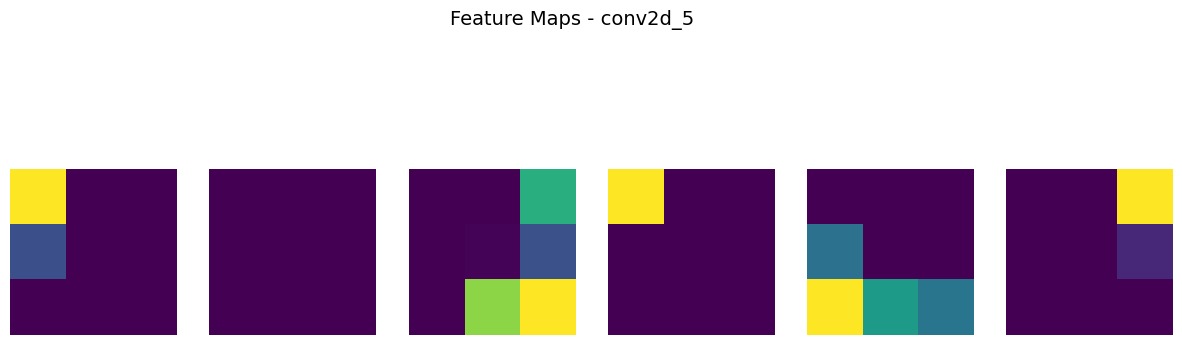

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import img_to_array

# Load the trained CNN model
model = load_model('cnn_model.h5')  # Ensure this is your trained model

# Print model summary to check layer names
model.summary()

# Load and preprocess a test image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")  # Adjust based on dataset
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Path to test image
test_image_path = "2_img.png"  # Replace with your test image path
img_array = preprocess_image(test_image_path)

# Ensure we access the correct input layer
if isinstance(model, tf.keras.Sequential):
    model_input = model.layers[0].input  # Fix for Sequential models
else:
    model_input = model.input  # For Functional or other models

# Extract convolutional layer outputs
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=model_input, outputs=layer_outputs)

# Get feature maps
activations = activation_model.predict(img_array)

# Function to plot feature maps
def plot_feature_maps(activations, model):
    layer_names = [layer.name for layer in model.layers if 'conv' in layer.name]  # Get conv layer names

    for layer_name, feature_map in zip(layer_names, activations):
        num_filters = feature_map.shape[-1]  # Number of feature maps
        size = feature_map.shape[1]  # Spatial size

        fig, axes = plt.subplots(1, min(num_filters, 6), figsize=(15, 5))  # Show up to 6 filters
        fig.suptitle(f"Feature Maps - {layer_name}", fontsize=14)

        for i in range(min(num_filters, 6)):  # Show only first 6 feature maps
            ax = axes[i]
            ax.imshow(feature_map[0, :, :, i], cmap='viridis')  # Show activation map
            ax.axis('off')

        plt.show()

# Plot the feature maps
plot_feature_maps(activations, model)
